In [105]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so
sns.set_theme(style="white", palette="muted")
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

In [106]:
# Import data

DATA_PATH = 'Reservoir_Project/Data'

In [107]:
basin_inflow = pd.read_excel(f'{DATA_PATH}/Custom/basin_inflow.xlsx', index_col=0)

In [108]:
basin_inflow.head()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
OBS DATE,,,,,,,,,,,,,,,,,,,,,
2008-01-01,27.666,9.52,0.00,44,58,34,20.24,0.00,38,7.67,...,30,7.90,44,55,37,7.72,0.04,40,61,30
2008-01-02,30.044,9.52,0.00,47,57,39,20.36,0.12,38,7.79,...,30,7.88,38,46,32,7.76,0.04,39,63,29
2008-01-03,48.478,9.76,0.24,45,50,38,20.36,0.00,39,7.79,...,30,7.86,30,35,25,7.76,0.00,40,53,29
2008-01-04,90.246,11.28,1.52,46,50,42,25.76,5.40,45,8.15,...,33,8.27,31,33,28,11.00,3.24,39,47,32
2008-01-05,200.200,11.96,0.68,41,46,37,27.44,1.68,58,11.75,...,33,8.27,31,33,28,12.04,1.04,33,38,32


In [132]:
# OBS DATE retained only for analysis. A data copy is saved for modeling. 

basin_inflow_no_dates = basin_inflow.reset_index(drop=True)
basin_inflow_no_dates.to_excel(f'{DATA_PATH}/Custom/basin_inflow_no_dates.xlsx') 

basin_inflow_no_dates.head()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
0,27.666,9.52,0.00,44,58,34,20.24,0.00,38,7.67,...,30,7.90,44,55,37,7.72,0.04,40,61,30
1,30.044,9.52,0.00,47,57,39,20.36,0.12,38,7.79,...,30,7.88,38,46,32,7.76,0.04,39,63,29
2,48.478,9.76,0.24,45,50,38,20.36,0.00,39,7.79,...,30,7.86,30,35,25,7.76,0.00,40,53,29
3,90.246,11.28,1.52,46,50,42,25.76,5.40,45,8.15,...,33,8.27,31,33,28,11.00,3.24,39,47,32
4,200.200,11.96,0.68,41,46,37,27.44,1.68,58,11.75,...,33,8.27,31,33,28,12.04,1.04,33,38,32


In [133]:
basin_inflow.columns 

Index(['INFLOW', 'ADR_PRECIP_ACC', 'ADR_PRECIP_INCR', 'ADR_TEMP_AVG',
       'ADR_TEMP_MAX', 'ADR_TEMP_MIN', 'HYS_PRECIP_ACC', 'HYS_PRECIP_INCR',
       'HYS_SNOW_DEPTH', 'HYS_SNOW_WATER_CONTENT', 'HYS_TEMP_AVG',
       'HYS_TEMP_MAX', 'HYS_TEMP_MIN', 'DUN_PRECIP_ACC', 'DUN_WIND_GUST',
       'DUN_WIND_SPEED', 'DUN_TEMP_AVG', 'DUN_TEMP_MAX', 'DUN_TEMP_MIN',
       'SGP_PRECIP_ACC', 'SGP_PRECIP_INCR', 'SGP_TEMP_AVG', 'SGP_TEMP_MAX',
       'SGP_TEMP_MIN', 'FRN_PRECIP_ACC', 'FRN_PRECIP_INCR', 'FRN_SNOW_DEPTH',
       'FRN_SNOW_WATER_CONTENT', 'FRN_TEMP_AVG', 'FRN_TEMP_MAX',
       'FRN_TEMP_MIN', 'PFH_PRECIP_ACC', 'PFH_PRECIP_INCR', 'PFH_TEMP_AVG',
       'PFH_TEMP_MAX', 'PFH_TEMP_MIN'],
      dtype='object')

In [110]:
# Utility functions

def handle_missing(df):
  # forward fill missing values
  df.ffill(axis=0, inplace=True)

# Seasonal data is differenced by substracting an observation from the same time in the previous cycle
def difference(dataset, interval=1):
    cols = []
    for col in dataset.columns: 
        col_data = dataset[col]
        series = col_data.values
        diff = list()
        for i in range(interval, len(series)):
            value = series[i] - series[i - interval]
            diff.append(value)
        cols.append(pd.Series(diff))
    
    return pd.concat(cols, axis=1)

### Analysis

In [111]:
# Summary statistics 

basin_inflow.describe()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
count,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,...,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000,4078.000000
mean,101.714391,20.923865,0.091182,61.257724,73.851643,51.001962,53.753085,0.246896,27.433055,8.190920,...,34.148112,11.142903,45.063512,54.541197,37.917607,31.849402,0.142065,53.956106,71.763610,40.485042
std,171.229725,13.522791,0.320736,13.516949,17.037502,11.032340,37.785032,0.653448,39.577624,13.433769,...,49.332494,16.001879,13.865843,15.448083,13.181329,23.716505,0.464197,13.620430,17.375523,10.026854
min,5.210000,0.000000,0.000000,31.000000,36.000000,2.000000,0.000000,0.000000,-2.000000,-0.730000,...,-81.000000,-3.090000,11.000000,17.000000,2.000000,0.000000,0.000000,21.000000,33.000000,11.000000
25%,31.290000,9.840000,0.000000,50.000000,59.000000,42.000000,26.080000,0.000000,1.000000,-0.120000,...,2.000000,0.610000,35.000000,43.000000,29.000000,13.930000,0.000000,43.000000,58.000000,32.000000
50%,50.475000,21.480000,0.000000,60.000000,73.000000,50.000000,51.600000,0.000000,5.000000,0.480000,...,6.000000,2.630000,44.000000,54.000000,36.000000,29.440000,0.000000,52.000000,72.000000,39.500000
75%,106.209500,27.590000,0.000000,73.000000,89.000000,60.000000,70.320000,0.120000,44.000000,11.510000,...,57.000000,19.325000,57.000000,68.000000,49.000000,43.520000,0.040000,67.000000,87.000000,49.000000
max,3189.633000,53.920000,4.680000,92.000000,110.000000,80.000000,158.600000,9.040000,160.000000,57.230000,...,185.000000,70.140000,75.000000,87.000000,68.000000,97.520000,5.760000,84.000000,108.000000,68.000000


#### Identifying and removing seasonality

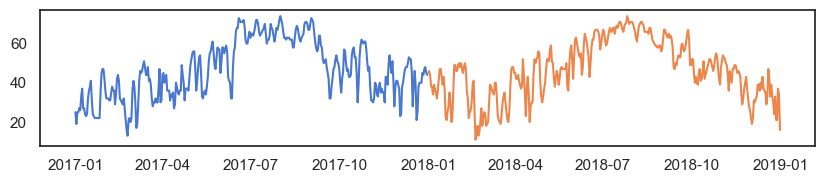

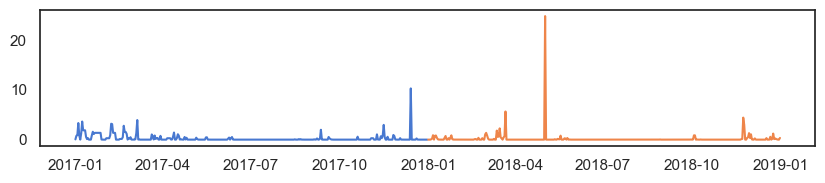

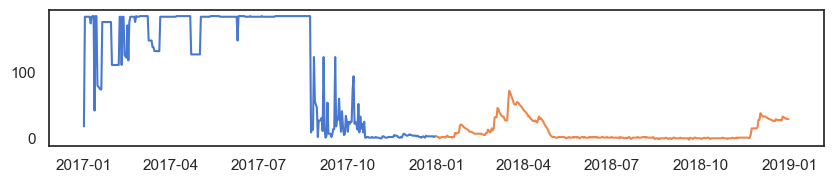

In [112]:
# Temperature has an evident seasonality (annually)

FRN_TEMP_AVG_DATES = basin_inflow['FRN_TEMP_AVG']
FRN_TEMP_AVG_2017 = FRN_TEMP_AVG_DATES['2017':'2018'].groupby(pd.Grouper(freq='1Y'))

# Precipitation

FRN_PRECIP_INCR_DATES = basin_inflow['FRN_PRECIP_INCR']
FRN_PRECIP_INCR_2017 = FRN_PRECIP_INCR_DATES['2017':'2018'].groupby(pd.Grouper(freq='1Y'))

# Snow depth

FRN_SNOW_DEPTH_DATES = basin_inflow['FRN_SNOW_DEPTH']
FRN_SNOW_DEPTH_2017 = FRN_SNOW_DEPTH_DATES['2017':'2018'].groupby(pd.Grouper(freq='1Y'))

def plot_group(groups):
    i = 1
    plt.figure(figsize=(10, 6))
    
    for name, group in groups:
        plt.subplot((n_groups*100) + 10 + 1)
        i += 1
        plt.plot(group)
    plt.show()
    
plot_group(FRN_TEMP_AVG_2017)
plot_group(FRN_PRECIP_INCR_2017) 
plot_group(FRN_SNOW_DEPTH_2017)

In [114]:
# A California Water Year starts in October and ends in September. Two years are obtained for differencing.

INFLOW_WATER_YEAR_2016_2018_DATES = basin_inflow.loc['2016-10-01':'2018-09-30']
INFLOW_WATER_YEAR_2016_2018 = INFLOW_WATER_YEAR_2016_2018_DATES.reset_index(names=['OBS DATE'])
INFLOW_WATER_YEAR_2016_2018.head()

,OBS DATE,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,...,FRN_SNOW_DEPTH,FRN_SNOW_WATER_CONTENT,FRN_TEMP_AVG,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN
0,2016-10-01,29.393,0.0,0.0,60,76,47,0.00,0.00,0,...,0,0.5,44,60,33,0.00,0.00,52,77,36
1,2016-10-02,43.183,0.0,0.0,55,66,48,0.00,0.00,0,...,0,0.5,44,60,33,0.12,0.12,45,64,31
2,2016-10-03,29.534,0.0,0.0,53,60,45,0.12,0.12,0,...,0,0.5,44,60,33,0.16,0.04,44,51,35
3,2016-10-04,32.819,0.0,0.0,58,72,47,0.24,0.12,1,...,0,0.5,44,60,33,0.20,0.04,49,70,36
4,2016-10-05,18.264,0.0,0.0,59,75,47,0.24,0.00,0,...,0,0.5,44,60,33,0.20,0.00,47,73,33


In [115]:
# CA water year: ['2016-10-01':'2018-09-30'] 

# interval for differencing data
days = 365

ADR_PRECIP_INCR_TEMP_MAX_WY_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'ADR_PRECIP_INCR', 'ADR_TEMP_MAX']] 

# difference data 

ADR_PRECIP_INCR_TEMP_MAX = ADR_PRECIP_INCR_TEMP_MAX_WY_2016_2018.copy()
stationary_ADR_PRECIP_INCR_TEMP_MAX = difference(ADR_PRECIP_INCR_TEMP_MAX, days)
stationary_ADR_PRECIP_INCR_TEMP_MAX.index = ADR_PRECIP_INCR_TEMP_MAX.index[days:]
stationary_ADR_PRECIP_INCR_TEMP_MAX.columns = ['ADR_PRECIP_INCR', 'ADR_TEMP_MAX']
handle_missing(stationary_ADR_PRECIP_INCR_TEMP_MAX)
print("Null/NaN count: ", stationary_ADR_PRECIP_INCR_TEMP_MAX.isnull().sum().sum())

Null/NaN count:  0


In [116]:
"""
Stationary check

If the test statistic is smaller than the critical value at 1%, we can reject the null hypothesis 
with a significance level of less than 1%. Rejecting the null hypothesis means the process has no unit root,
and the time series is stationary or does not have a time-dependent structure.
"""

# ADR
result = adfuller(stationary_ADR_PRECIP_INCR_TEMP_MAX["ADR_TEMP_MAX"])

print("ADF : ",result[0])
print("P-Value : ", result[1])
print("Num Of Lags (seasonality of x number of months): ", result[2])
print("Num Of Observations Used For ADF Regression and Critical Values Calculation :", result[3])
print("Critical Values :")
for key, val in result[4].items():
 print("\t",key, ": ", val) 

ADF :  -3.572167541044768
P-Value :  0.006315968108646034
Num Of Lags (seasonality of x number of months):  13
Num Of Observations Used For ADF Regression and Critical Values Calculation : 369
Critical Values :
	 1% :  -3.448196541708585
	 5% :  -2.869404683789669
	 10% :  -2.5709597356805545


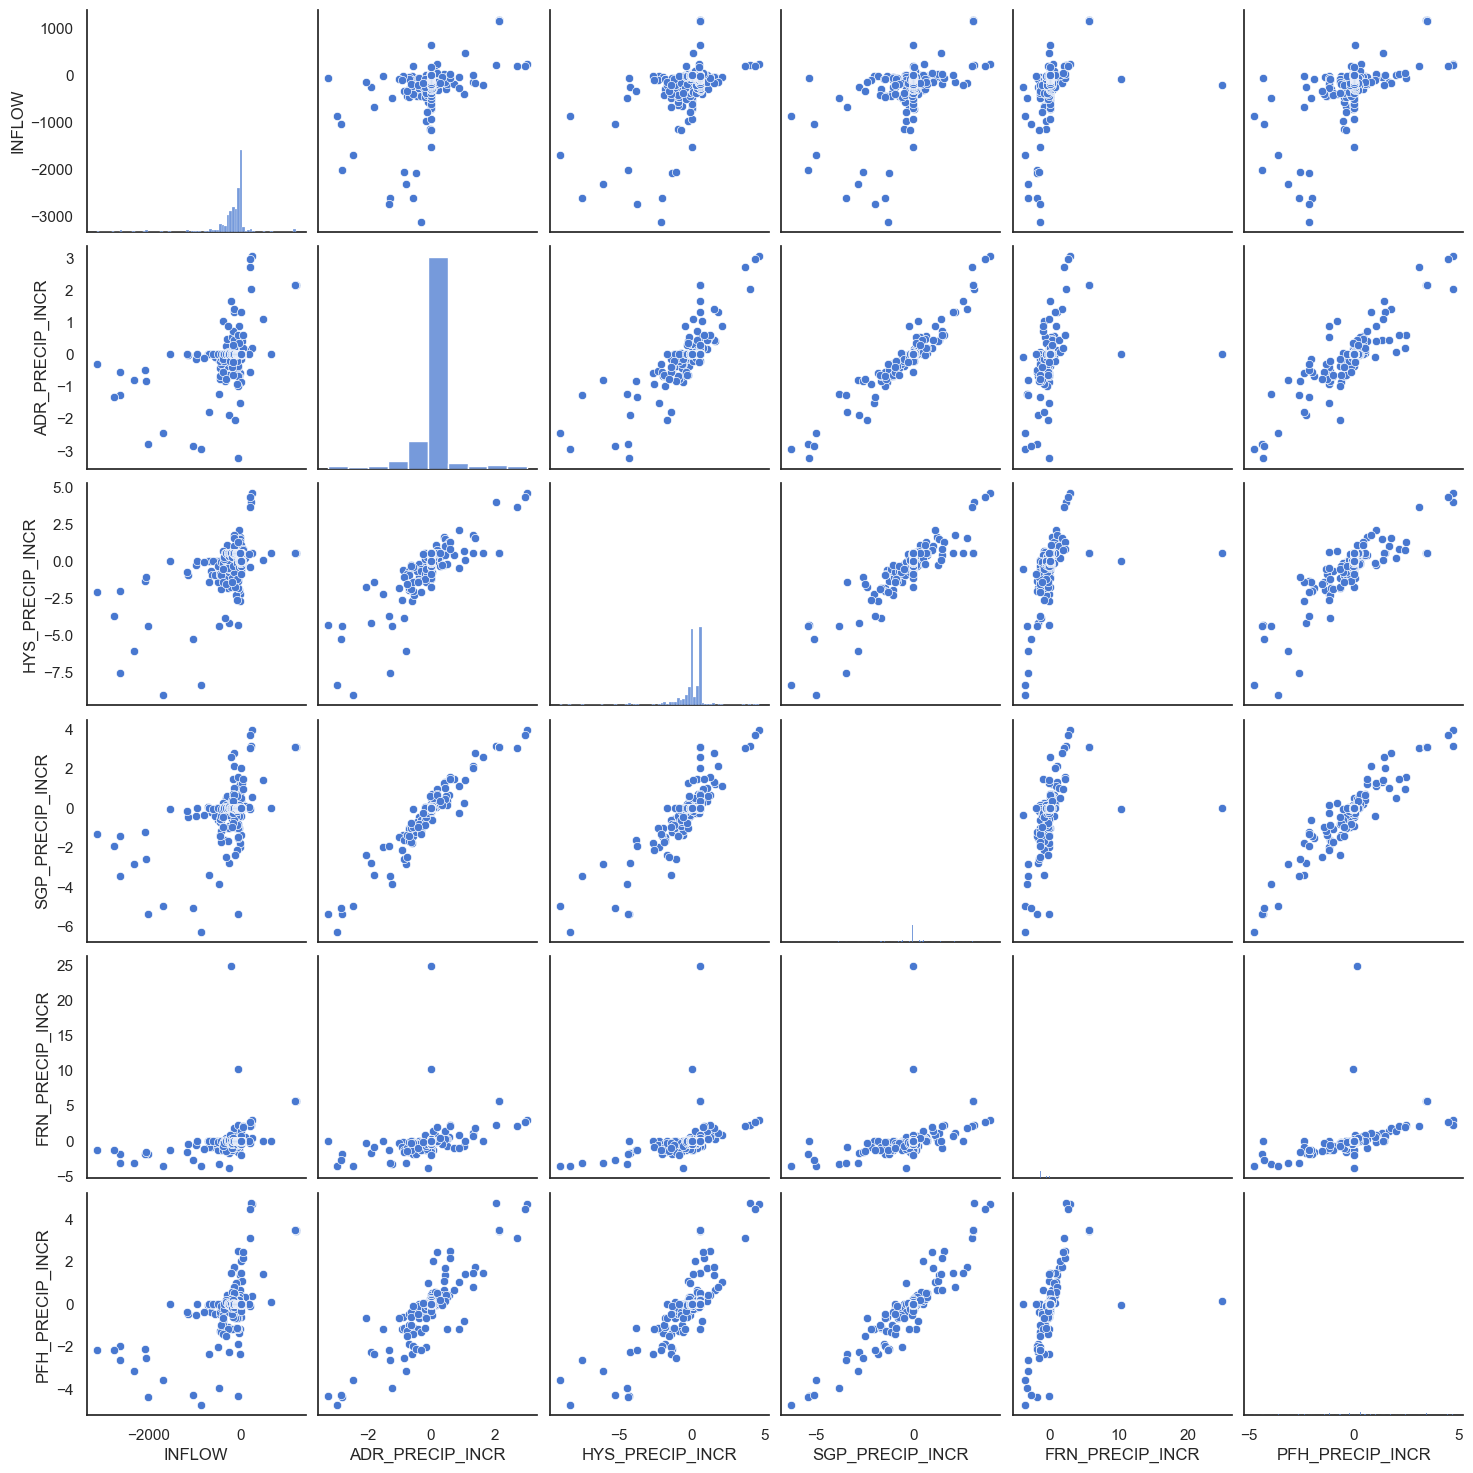

In [117]:
# Inflow and Precipitation: no correlation found

PRECIP_INCR_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'INFLOW', 'ADR_PRECIP_INCR', 'HYS_PRECIP_INCR', 'SGP_PRECIP_INCR', 'FRN_PRECIP_INCR', 'PFH_PRECIP_INCR']] 

PRECIP_INCR_2016_2018_DIFF = PRECIP_INCR_2016_2018.copy()
stationary_PRECIP_INCR_2016_2018_DIFF = difference(PRECIP_INCR_2016_2018_DIFF, days)
stationary_PRECIP_INCR_2016_2018_DIFF.index = PRECIP_INCR_2016_2018_DIFF.index[days:]
stationary_PRECIP_INCR_2016_2018_DIFF.columns = ['INFLOW', 'ADR_PRECIP_INCR', 'HYS_PRECIP_INCR', 'SGP_PRECIP_INCR', 'FRN_PRECIP_INCR', 'PFH_PRECIP_INCR']
handle_missing(stationary_PRECIP_INCR_2016_2018_DIFF)

sns.pairplot(stationary_PRECIP_INCR_2016_2018_DIFF)

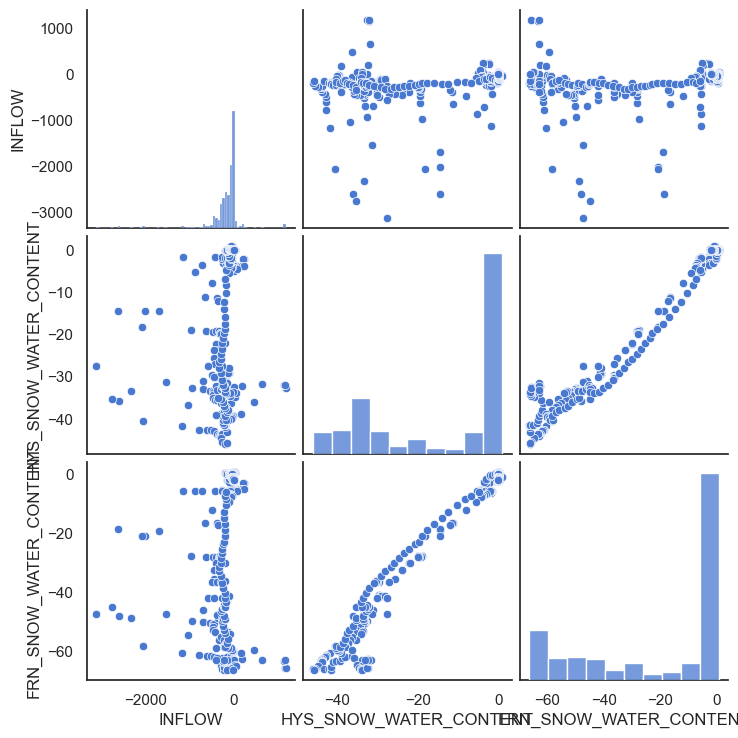

In [101]:
# Inflow and Snow Water Content: no correlation found 

SNOW_WATER_CONTENT_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'INFLOW', 'HYS_SNOW_WATER_CONTENT', 'FRN_SNOW_WATER_CONTENT']] 

SNOW_WATER_CONTENT_2016_2018_DIFF = SNOW_WATER_CONTENT_2016_2018.copy()
stationary_SNOW_WATER_CONTENT_2016_2018_DIFF = difference(SNOW_WATER_CONTENT_2016_2018_DIFF, days)
stationary_SNOW_WATER_CONTENT_2016_2018_DIFF.index = SNOW_WATER_CONTENT_2016_2018_DIFF.index[days:]
stationary_SNOW_WATER_CONTENT_2016_2018_DIFF.columns = ['INFLOW', 'HYS_SNOW_WATER_CONTENT', 'FRN_SNOW_WATER_CONTENT']
handle_missing(stationary_SNOW_WATER_CONTENT_2016_2018_DIFF)

sns.pairplot(stationary_SNOW_WATER_CONTENT_2016_2018_DIFF)

Rainfall intensity is a combination of moisture brought in from the Pacific Ocean, the Gulf of Mexico, and some  pathways up through the Gulf of California, lift (when air lifts up high enough in the atmosphere so it condenses and forms the liquid that will eventually become rain), and instability (warm air close to the ground rises very quickly). Nonetheless, a relevant correlation in the data could not be identified (see graph below).

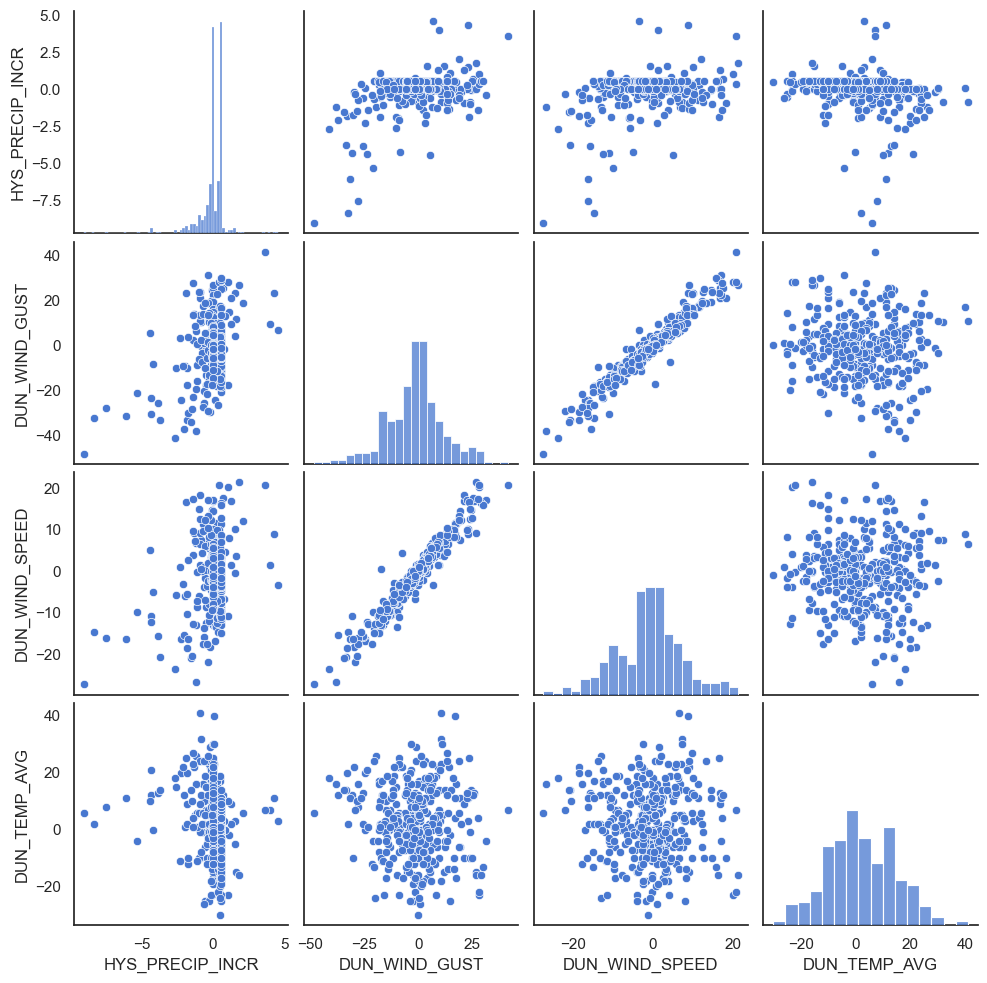

In [118]:
# Precipitation (at nearby station), wind speed/gust, and average temperature: 
# no correlations found except between wind gust and speed as expected 

DUN_2016_2018 = INFLOW_WATER_YEAR_2016_2018.loc[:, [
    'HYS_PRECIP_INCR', 'DUN_WIND_GUST', 'DUN_WIND_SPEED', 'DUN_TEMP_AVG']] 

DUN_2016_2018_DIFF = DUN_2016_2018.copy()
stationary_DUN_2016_2018_DIFF = difference(DUN_2016_2018_DIFF, days)
stationary_DUN_2016_2018_DIFF.index = DUN_2016_2018_DIFF.index[days:]
stationary_DUN_2016_2018_DIFF.columns = ['HYS_PRECIP_INCR', 'DUN_WIND_GUST', 'DUN_WIND_SPEED', 'DUN_TEMP_AVG']
handle_missing(stationary_DUN_2016_2018_DIFF)

sns.pairplot(stationary_DUN_2016_2018_DIFF)

#### Snowpacks

In [119]:
"""
Water Year 2017: Oct 2017 - September 2018 
"""

INFLOW_WY_2017 = basin_inflow.loc['2017-10-01':'2018-09-30']

INFLOW_DATES_2017 = INFLOW_WY_2017.copy()
INFLOW_DATES_2017['Date'] = INFLOW_DATES_2017.index.values
INFLOW_DATES_2017['Month'] = INFLOW_DATES_2017['Date'].map(lambda time: pd.Timestamp(time).month)
season_by_month = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Autumn', 10: 'Autumn', 11: 'Autumn', 12: 'Winter'}
INFLOW_DATES_2017['Season'] = INFLOW_DATES_2017['Month'].map(lambda month: season_by_month[month])

INFLOW_DATES_2017.head()

,INFLOW,ADR_PRECIP_ACC,ADR_PRECIP_INCR,ADR_TEMP_AVG,ADR_TEMP_MAX,ADR_TEMP_MIN,HYS_PRECIP_ACC,HYS_PRECIP_INCR,HYS_SNOW_DEPTH,HYS_SNOW_WATER_CONTENT,...,FRN_TEMP_MAX,FRN_TEMP_MIN,PFH_PRECIP_ACC,PFH_PRECIP_INCR,PFH_TEMP_AVG,PFH_TEMP_MAX,PFH_TEMP_MIN,Date,Month,Season
OBS DATE,,,,,,,,,,,,,,,,,,,,,
2017-10-01,39.785,0.0,0.0,65,79,54,0.0,0.0,1,0.0,...,61,38,0.0,0.0,55,78,42,2017-10-01,10,Autumn
2017-10-02,34.943,0.0,0.0,63,75,52,0.0,0.0,1,0.0,...,54,32,0.0,0.0,53,72,38,2017-10-02,10,Autumn
2017-10-03,23.758,0.0,0.0,62,77,50,0.0,0.0,1,0.0,...,43,32,0.0,0.0,47,66,35,2017-10-03,10,Autumn
2017-10-04,22.710,0.0,0.0,63,78,51,0.0,0.0,1,0.0,...,54,32,0.0,0.0,50,75,34,2017-10-04,10,Autumn
2017-10-05,16.650,0.0,0.0,64,80,50,0.0,0.0,1,0.0,...,59,37,0.0,0.0,53,81,36,2017-10-05,10,Autumn


In [120]:
"""
Forni Ridge (elevation 7,600') Snowpack Depth Water Year 2017
"""

FRN_SNOW_DEPTH_2017 = INFLOW_DATES_2017.loc[:, ['FRN_SNOW_DEPTH', 'Month']]
FRN_SD_MONTHLY_2017 = FRN_SNOW_DEPTH_2017.copy().groupby(by="Month").mean()
FRN_SD_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

FRN_SD_MONTHLY_2017

,FRN_SNOW_DEPTH,MONTH
Month,,
1,6.580645,JAN
2,8.964286,FEB
3,45.594595,MAR
4,25.566667,APR
5,1.451613,MAY
6,1.366667,JUN
7,0.903226,JUL
8,0.483871,AUG
9,0.066667,SEP


The graph below shows snowpack peak is about 30 days earlier than historical data (April 1st).

This reflects with what we know about the shift in the timing of the water supply due to climate change. In the West, snowpacks have melted about one month faster because of warmer temperatures. 

Additionally, warmer temperatures may mean that snow may start falling as rain instead, resulting in smaller natural reservoirs (snowpacks) and lower flows in the late summer months.

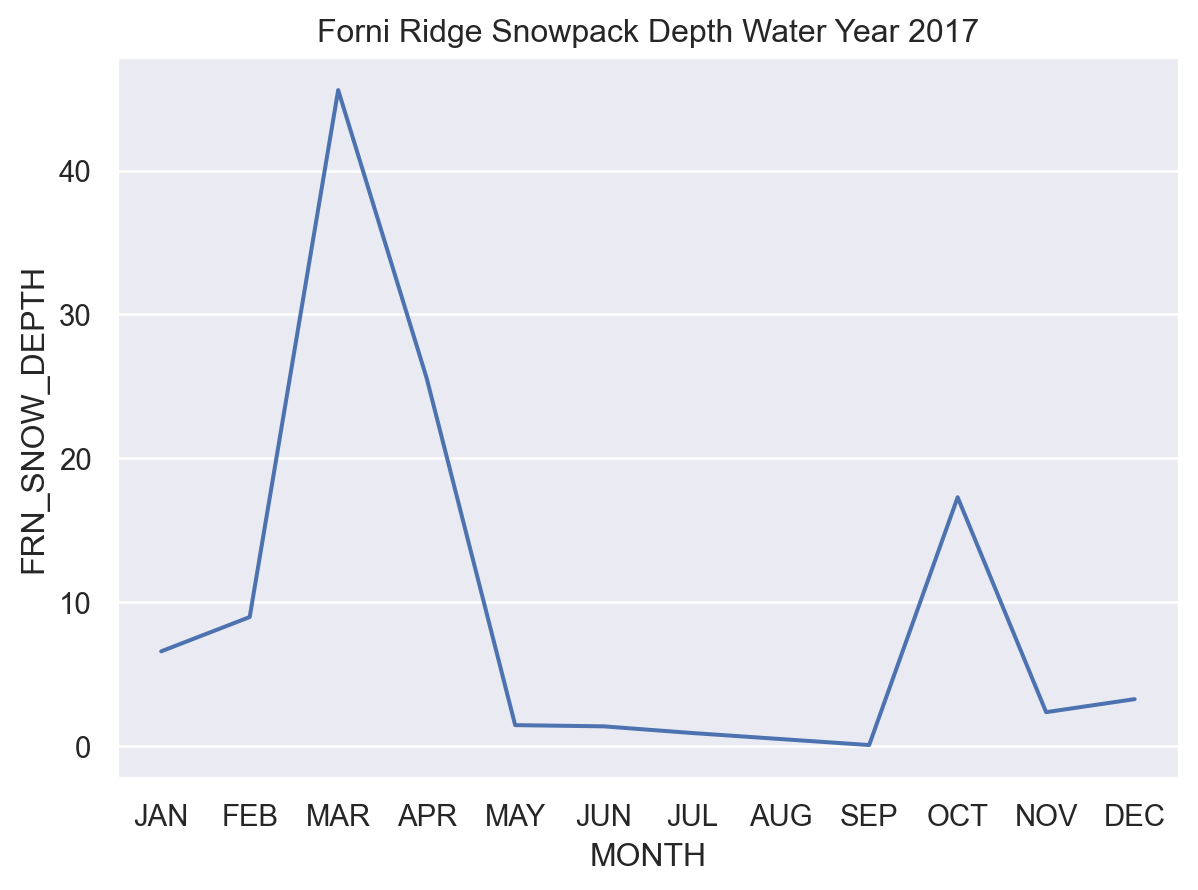

In [121]:
(
    so.Plot(FRN_SD_MONTHLY_2017, x="MONTH", y="FRN_SNOW_DEPTH")
    .add(so.Line())
    .label(title="Forni Ridge Snowpack Depth Water Year 2017")
)

In [122]:
"""
Huysink (elevation 6,600') Snowpack Depth Water Year 2017
"""

HYS_SNOW_DEPTH_2017 = INFLOW_DATES_2017.loc[:, ['HYS_SNOW_DEPTH', 'Month']]
HYS_SD_MONTHLY_2017 = HYS_SNOW_DEPTH_2017.copy().groupby(by="Month").mean()
HYS_SD_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

HYS_SD_MONTHLY_2017

,HYS_SNOW_DEPTH,MONTH
Month,,
1,6.548387,JAN
2,11.785714,FEB
3,47.378378,MAR
4,31.133333,APR
5,3.580645,MAY
6,0.200000,JUN
7,-0.032258,JUL
8,0.032258,AUG
9,0.666667,SEP


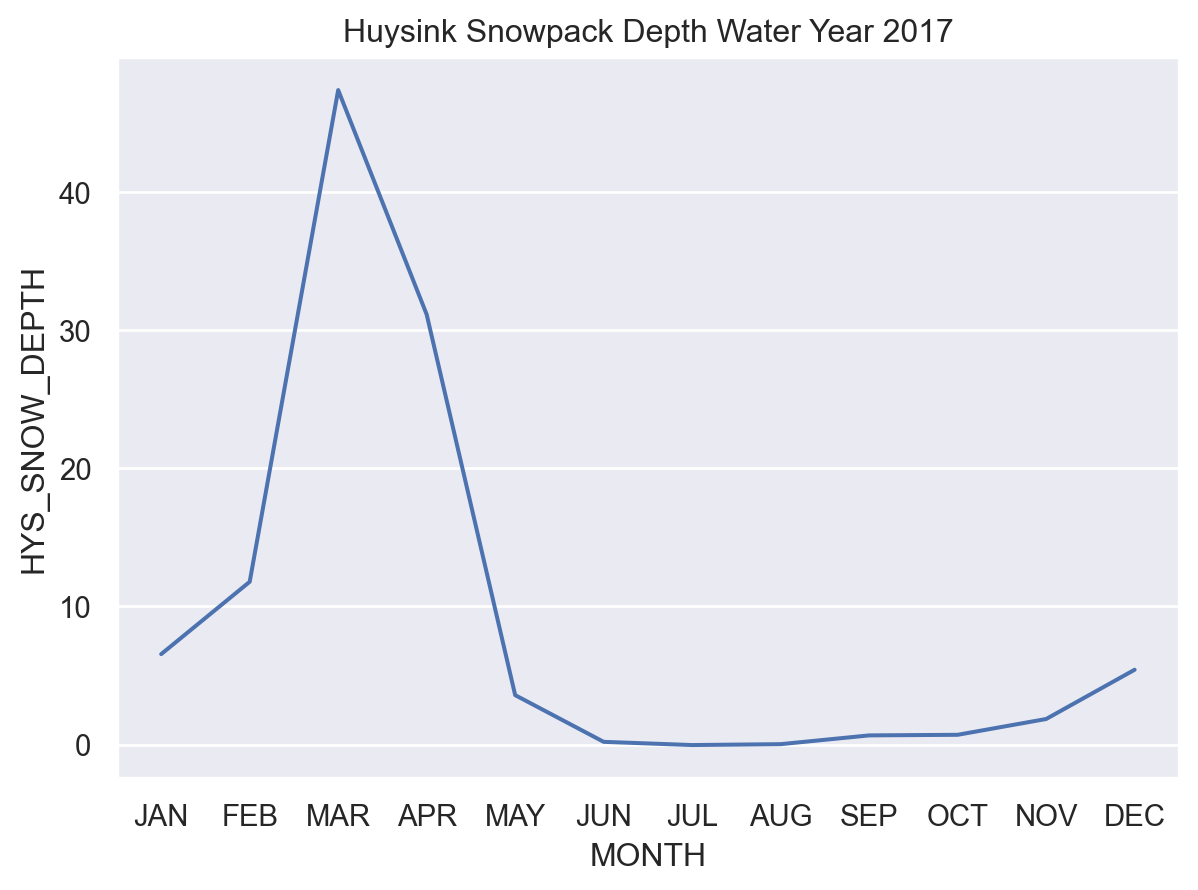

In [123]:
# Huysink snowpack record is consistent with the pattern observed at Forni Ridge at 1,000 feet lower elevation

(
    so.Plot(HYS_SD_MONTHLY_2017, x="MONTH", y="HYS_SNOW_DEPTH")
    .add(so.Line())
    .label(title="Huysink Snowpack Depth Water Year 2017")
)

In [124]:
SNOW_WATER_CONTENT_2017 = INFLOW_DATES_2017.loc[:, ['HYS_SNOW_WATER_CONTENT', 'FRN_SNOW_WATER_CONTENT', 'Season']]

hys_swc = SNOW_WATER_CONTENT_2017['HYS_SNOW_WATER_CONTENT'].to_numpy()
hys_swc_loc = len(SNOW_WATER_CONTENT_2017['HYS_SNOW_WATER_CONTENT'].values) * ['Huysink']
hys_seasons = SNOW_WATER_CONTENT_2017['Season'].to_numpy()

frn_swc = SNOW_WATER_CONTENT_2017['FRN_SNOW_WATER_CONTENT'].to_numpy()
frn_swc_loc = len(SNOW_WATER_CONTENT_2017['FRN_SNOW_WATER_CONTENT'].values) * ['Forni Ridge']
frn_seasons = SNOW_WATER_CONTENT_2017['Season'].to_numpy()

swc_locations = hys_swc_loc + frn_swc_loc
swc_values = np.concatenate((hys_swc, frn_swc))
swc_seasons = np.concatenate((hys_seasons, frn_seasons))

regional_swc = {'Location': swc_locations, 'Snow Water Content': swc_values, 'Season': swc_seasons}

REGIONAL_SNOW_WATER_CONTENT_2017 = pd.DataFrame(data=regional_swc)

REGIONAL_SNOW_WATER_CONTENT_2017.head()

,Location,Snow Water Content,Season
0,Huysink,0.0,Autumn
1,Huysink,0.0,Autumn
2,Huysink,0.0,Autumn
3,Huysink,0.0,Autumn
4,Huysink,0.0,Autumn


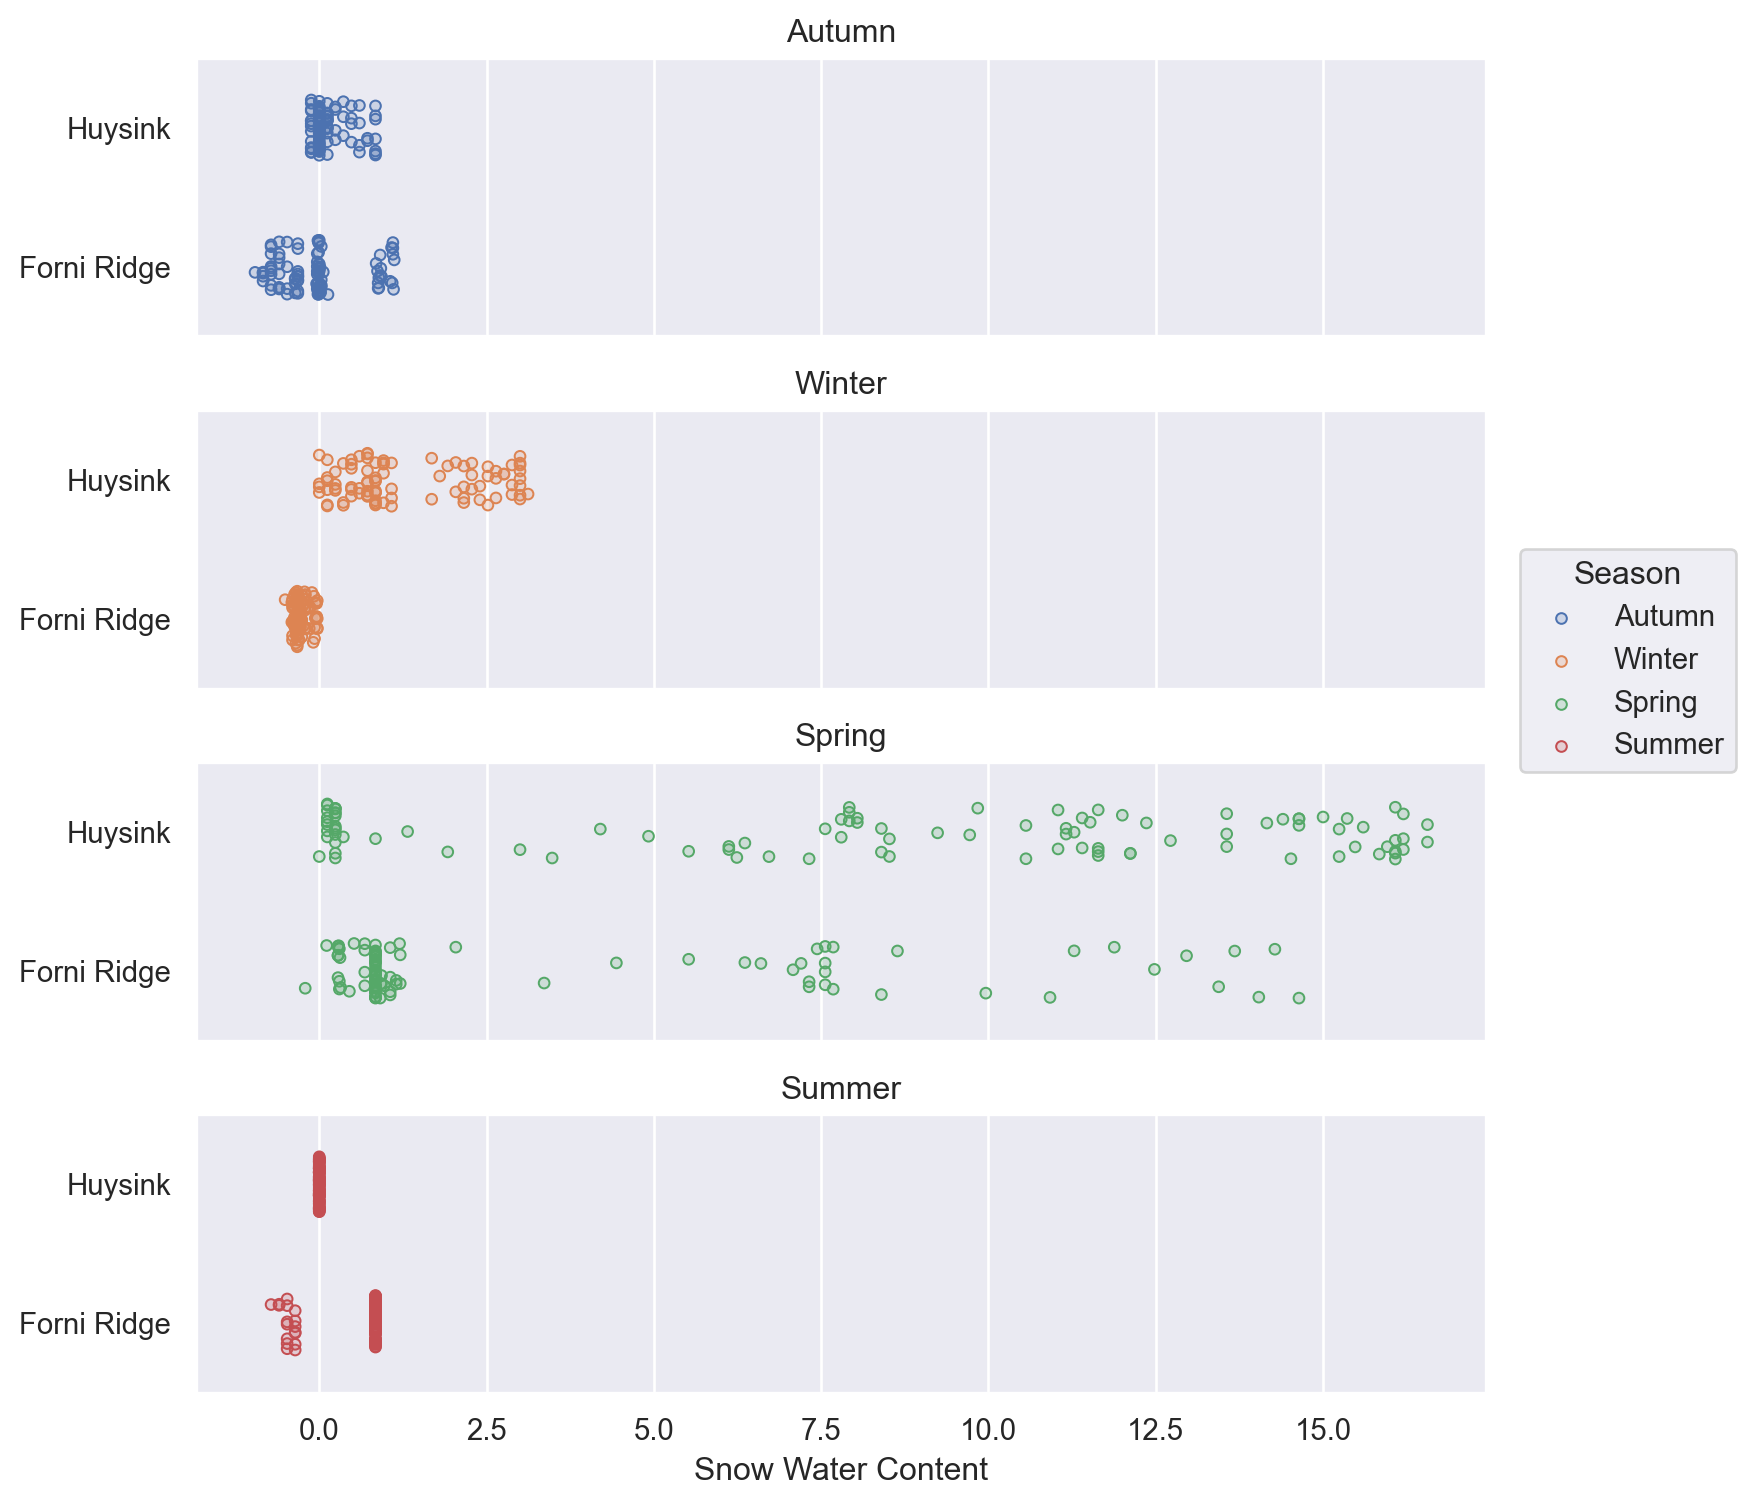

In [125]:
"""
Regional differences in snow-water content have been noted in the Sierra Nevada. 
Cooler air temperatures at higher elevations generally allow for more snow to accumulate. 

However, although Huysink is at an elevation 1000' lower than Forni Ridge, the location maintains 
about 2" more snow water content in the Spring. 
"""


(
    so.Plot(REGIONAL_SNOW_WATER_CONTENT_2017, x="Snow Water Content", y="Location", color="Season")
    .facet(row="Season")
    .layout(size=(8, 8))
    .add(so.Dots(pointsize=4), so.Jitter(.5))
    .label(
        x="Snow Water Content", y=""
    )
)

#### Storage and water balance

Water managers account for all of the water in a given watershed using the hydrological partitioning or water balance equation. The equation represents where all the water in a watershed goes and where all of it came from. 

Equation: P = Q + ET + 𐤃S

Precipitation is equal to the amount of runoff (Q) plus the amount of evapotranspiration (ET) plus the change in storage. Storage refers to fresh water storage in ice, snow, groundwater, and reservoirs.

Thus, we can assert that the change in storage across a watershed is equal to precipitation minus runoff minus evapotranspiration. 

𐤃S = P - Q - ET

#### Moisture islands

When evaluating future reservoir storage, it is crucial to look at the areas with the highest precipitation and lowest evapotranspiration (evaporation from soil and transpiration from plants). Of course, runoff either percolates into an aquifer or into rivers and streams, but the analysis will not attend to runoff as the scope of the data utilized for the model is specifically focused on weather.

Mountains are referred to as moisture islands, because in higher elevations we expect to see greater precipitation since mountains act as barries to incoming weather systems, forcing the air including the moisture to be lifted over these barriers so that the moisture condenses and falls as precipitation, building snowpacks.

The watershed has a snowmelt dominated hydrology given that the mountains experience high precipitation and low evapotranspiration producing almost all of the runoff.

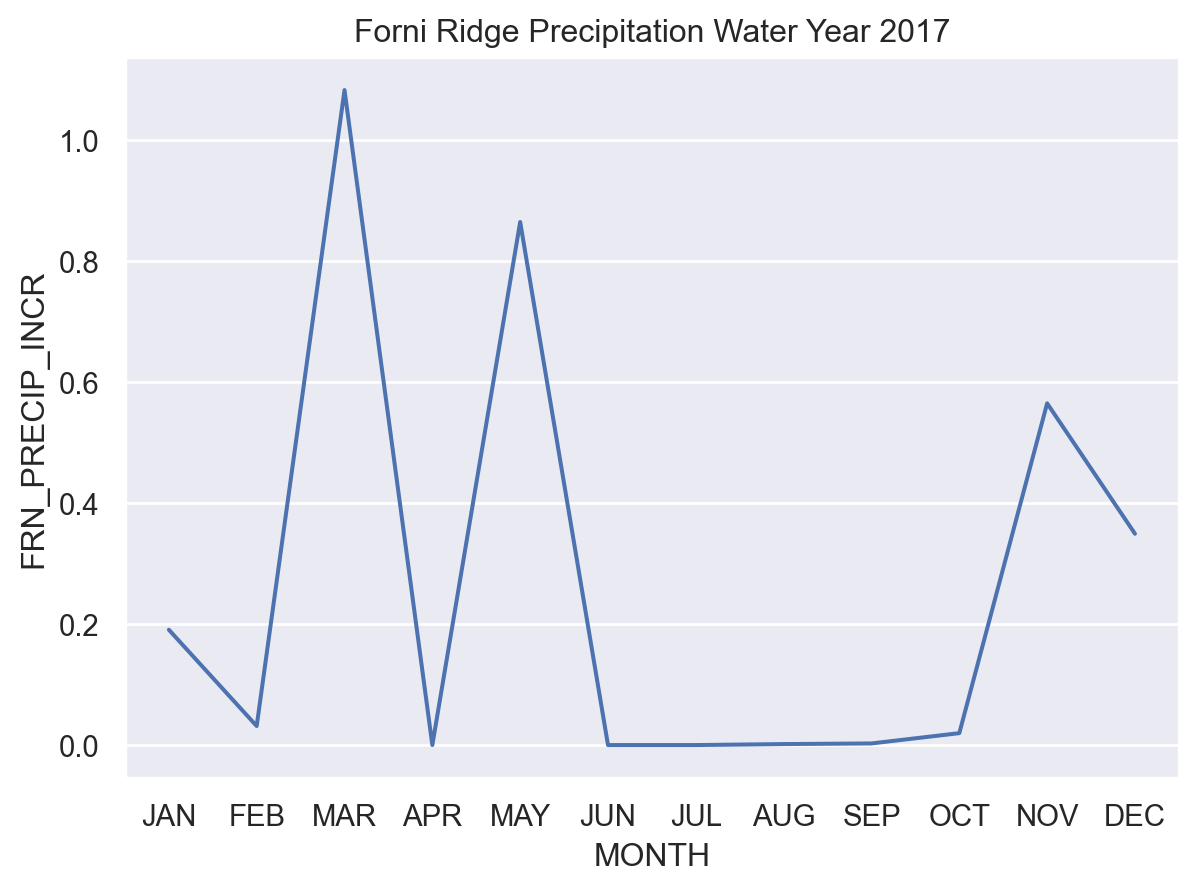

In [126]:
"""
Forni Ridge (elevation 7,600') Precipitation Water Year 2017
"""

FRN_PRECIP_INCR_2017 = INFLOW_DATES_2017.loc[:, ['FRN_PRECIP_INCR', 'Month']]

FRN_PI_MONTHLY_2017 = FRN_PRECIP_INCR_2017.copy().groupby(by="Month").mean()
FRN_PI_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

(
    so.Plot(FRN_PI_MONTHLY_2017, x="MONTH", y="FRN_PRECIP_INCR")
    .add(so.Line())
    .label(title="Forni Ridge Precipitation Water Year 2017")
)

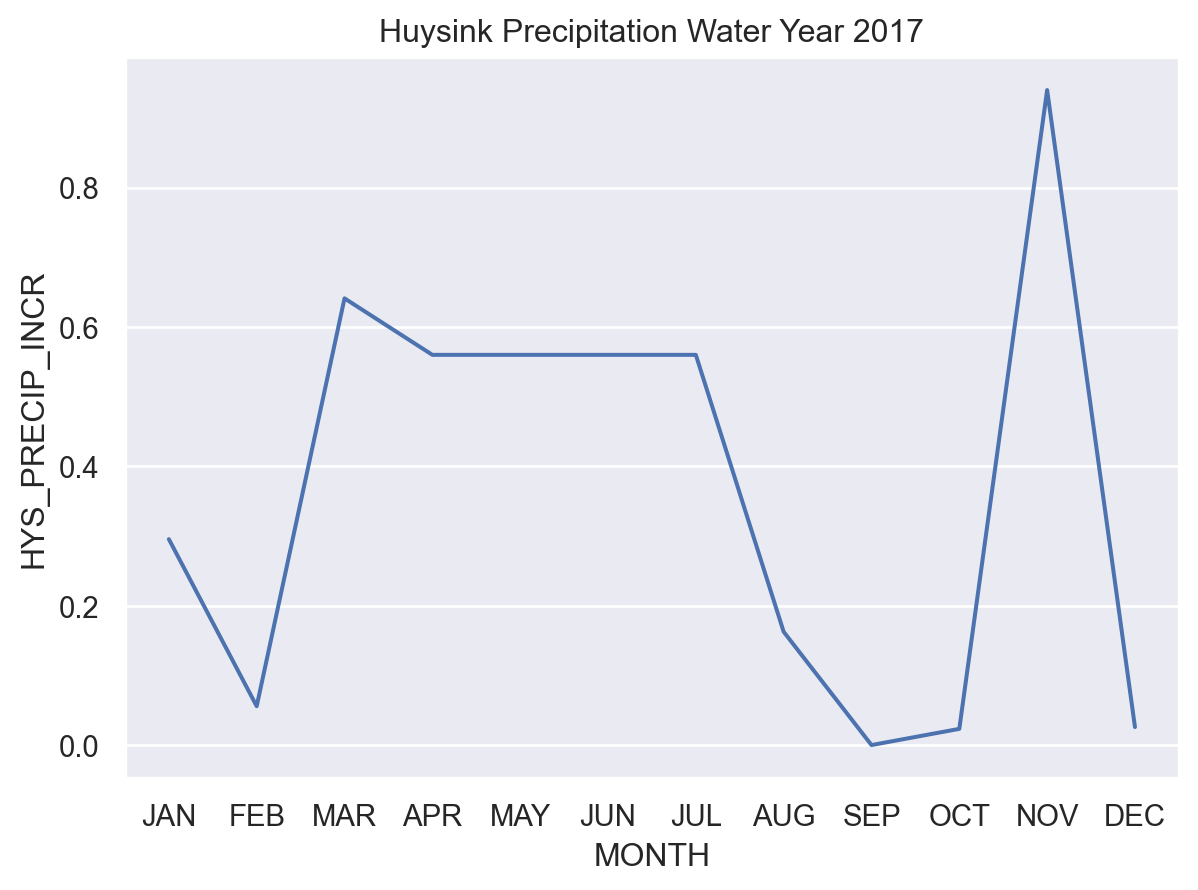

In [127]:
"""
Huysink (elevation 7,600') Precipitation Water Year 2017
"""

HYS_PRECIP_INCR_2017 = INFLOW_DATES_2017.loc[:, ['HYS_PRECIP_INCR', 'Month']]

HYS_PI_MONTHLY_2017 = HYS_PRECIP_INCR_2017.copy().groupby(by="Month").mean()
HYS_PI_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

(
    so.Plot(HYS_PI_MONTHLY_2017, x="MONTH", y="HYS_PRECIP_INCR")
    .add(so.Line())
    .label(title="Huysink Precipitation Water Year 2017")
)

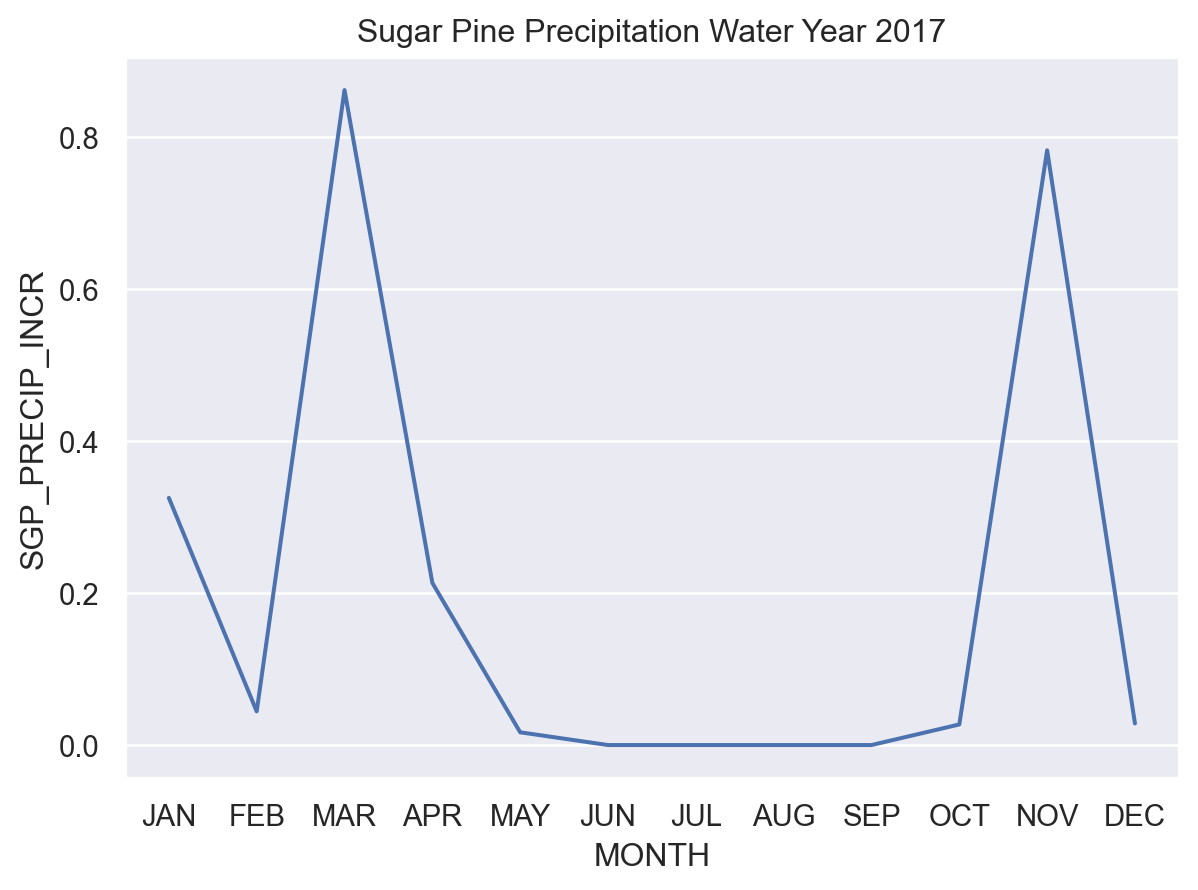

In [128]:
"""
Sugar Pine (elevation 3,843') Precipitation Water Year 2017
"""

SGP_PRECIP_INCR_2017 = INFLOW_DATES_2017.loc[:, ['SGP_PRECIP_INCR', 'Month']]

SGP_PI_MONTHLY_2017 = SGP_PRECIP_INCR_2017.copy().groupby(by="Month").mean()
SGP_PI_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

(
    so.Plot(SGP_PI_MONTHLY_2017, x="MONTH", y="SGP_PRECIP_INCR")
    .add(so.Line())
    .label(title="Sugar Pine Precipitation Water Year 2017")
)

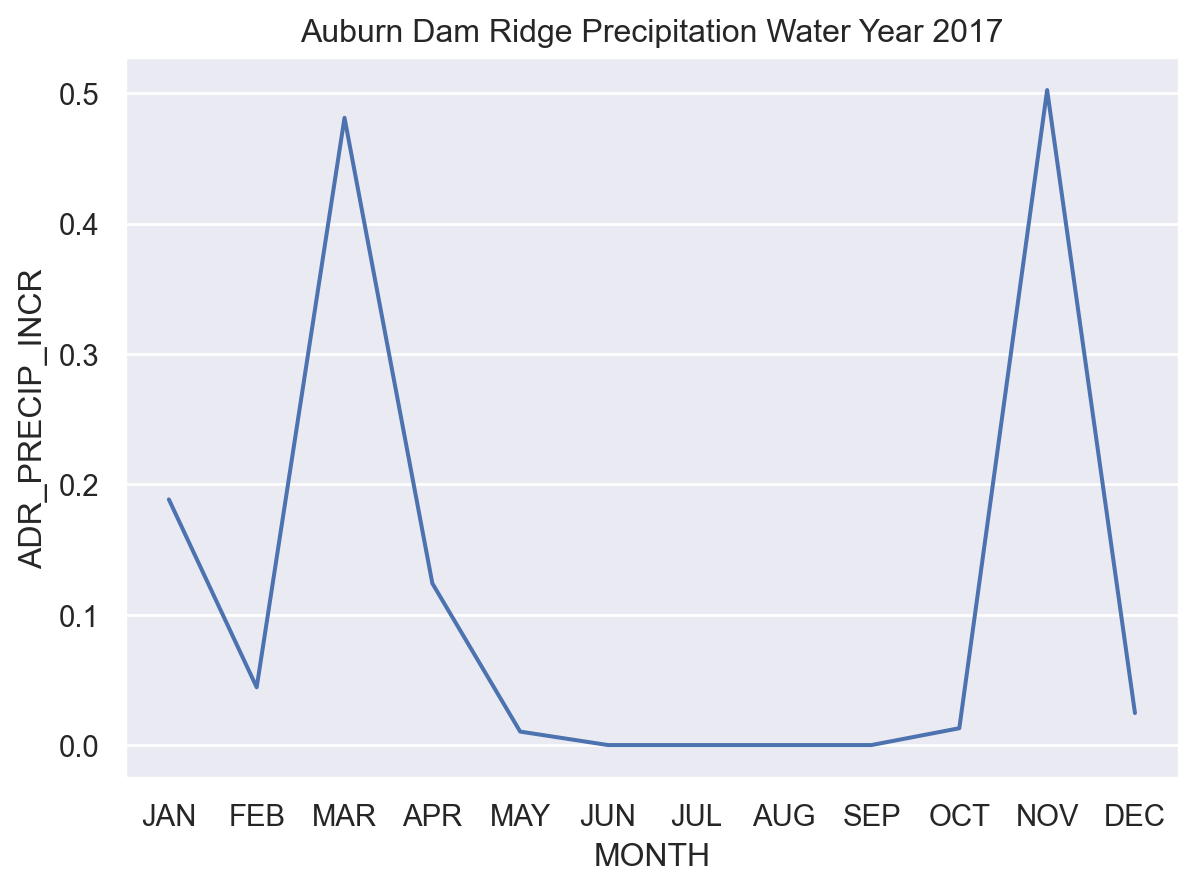

In [129]:
"""
Auburn Dam Ridge (elevation 1,200') Precipitation Water Year 2017
"""

ADR_PRECIP_INCR_2017 = INFLOW_DATES_2017.loc[:, ['ADR_PRECIP_INCR', 'Month']]

ADR_PI_MONTHLY_2017 = ADR_PRECIP_INCR_2017.copy().groupby(by="Month").mean()
ADR_PI_MONTHLY_2017['MONTH'] = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]

(
    so.Plot(ADR_PI_MONTHLY_2017, x="MONTH", y="ADR_PRECIP_INCR")
    .add(so.Line())
    .label(title="Auburn Dam Ridge Precipitation Water Year 2017")
)

The precipitation at different elevations in the watershed over the course of a water year corresponds to what we know about moisture islands and their greater precipitation. Both Forni Ridge and Huysink demonstrate higher rainfall quantity and monthly variation than lower elevation areas. 